<a href="https://colab.research.google.com/github/CharlyPierce/CNN/blob/main/(Copy)_of_l05c02_dogs_vs_cats_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Clasificación de imágenes de perros vs gatos con aumento de imagen

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c02_dogs_vs_cats_with_augmentation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c02_dogs_vs_cats_with_augmentation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

En este tutorial, discutiremos cómo clasificar imágenes en imágenes de gatos o imágenes de perros. Construiremos un clasificador de imágenes usando el modelo `tf.keras.Sequential` y cargaremos los datos usando `tf.keras.preprocessing.image.ImageDataGenerator`.

## Conceptos específicos que se tratarán:
En el proceso, construiremos experiencia práctica y desarrollaremos la intuición en torno a los siguientes conceptos

*Construir data input pipelines usando la clase `tf.keras.preprocessing.image.ImageDataGenerator` — ¿Cómo podemos trabajar eficientemente con datos en el disco para interactuar con nuestro modelo?

* Overfitting - ¿Qué es, cómo identificarlo?
* _Data Augmentation_ and _Dropout_ - Técnicas clave para luchar contra el sobreajuste en las tareas de visión por computadora que incorporaremos a nuestro pipeline y modelo clasificador de imágenes.

## Seguiremos el flujo de trabajo general de aprendizaje automático:
1. Examinar y comprender los datos 
2. Cree una pipeline de entrada 
3. Construye nuestro modelo 
4. Entrena nuestro modelo 
5. Probar nuestro modelo 
6. Mejorar nuestro modelo/Repetir el proceso

<hr>

**Antes de que empieces**
Antes de ejecutar el código en este cuaderno, restablezca el tiempo de ejecución yendo a **Runtime -> Reset all runtimes**  en el menú de arriba. Si ha estado trabajando en varias libretas, esto lo ayudará a evitar alcanzar los límites de memoria de Colab.


# Importando paquetes

Comencemos importando los paquetes requeridos:

* os — para leer archivos y estructura de directorios
*numpy: para algunas matemáticas de matriz fuera de TensorFlow
*matplotlib.pyplot: para trazar el gráfico y mostrar imágenes en nuestros datos de entrenamiento y validación

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

#Carga de datos

Para construir nuestro clasificador de imágenes, comenzamos descargando el conjunto de datos. El conjunto de datos que estamos usando es una versión filtrada del conjunto de datos <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">Dogs vs. Cats</a> de Kaggle (por último, este conjunto de datos lo proporciona Microsoft Research).

En Colabs anteriores, usamos <a href="https://www.tensorflow.org/datasets" target="_blank">TensorFlow Datasets</a>, que es una forma muy fácil y conveniente de usar Datasets. Sin embargo, en este Colab, utilizaremos la clase `tf.keras.preprocessing.image.ImageDataGenerator` que leerá los datos del disco. Por lo tanto, debemos descargar directamente Dogs vs. Cats desde una URL y descomprimirlo en el sistema de archivos de Colab.

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 1s 0us/step


El conjunto de datos que hemos descargado tiene la siguiente estructura de directorios.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

Ahora asignaremos variables con la ruta de archivo adecuada para los conjuntos de entrenamiento y validación.

In [5]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

### Entendiendo nuestros datos

Veamos cuántas imágenes de gatos y perros tenemos en nuestro directorio de entrenamiento y validación

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


# Configuración de parámetros del modelo

Para mayor comodidad, configuraremos variables que se utilizarán más adelante mientras procesamos previamente nuestro conjunto de datos y entrenamos nuestra red.

In [9]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

Después de definir nuestros generadores para imágenes de entrenamiento y validación, el método **flow_from_directory** cargará imágenes desde el disco y aplicará el cambio de escala y las cambiará de tamaño a las dimensiones requeridas usando una sola línea de código.

# Data Augmentation
##Aumento de los datos

El sobreajuste a menudo ocurre cuando tenemos una pequeña cantidad de ejemplos de entrenamiento. Una forma de solucionar este problema es aumentar nuestro conjunto de datos para que tenga suficiente cantidad y variedad de ejemplos de entrenamiento. El aumento de datos adopta el enfoque de generar más datos de entrenamiento a partir de muestras de entrenamiento existentes, aumentando las muestras a través de transformaciones aleatorias que producen imágenes de aspecto creíble. El objetivo es que en el momento del entrenamiento, su modelo nunca vea exactamente la misma imagen dos veces. Esto expone el modelo a más aspectos de los datos, lo que le permite generalizar mejor.

En **tf.keras** podemos implementar esto usando la misma clase **ImageDataGenerator** que usamos antes. Simplemente podemos pasar diferentes transformaciones que querríamos a nuestro dataset como una forma de argumentos y se encargará de aplicarlo al dataset durante nuestro proceso de entrenamiento. Para empezar, definamos una función que pueda mostrar una imagen, para que podamos ver el tipo de aumento que se ha realizado. Luego, veremos aumentos específicos que usaremos durante el entrenamiento.

In [10]:
# Esta función trazará imágenes en forma de cuadrícula con 1 fila y 5 columnas donde las imágenes se colocan en cada columna.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Voltear la imagen horizontalmente

Podemos comenzar aplicando aleatoriamente el aumento de volteo horizontal a nuestro conjunto de datos y viendo cómo se verán las imágenes individuales después de la transformación. Esto se logra pasando `horizontal_flip=True`  como argumento a la clase `ImageDataGenerator`.

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


Para ver la transformación en acción, tomemos una imagen de muestra de nuestro conjunto de entrenamiento y repitamos cinco veces. El aumento se aplicará aleatoriamente (o no) a cada repetición.

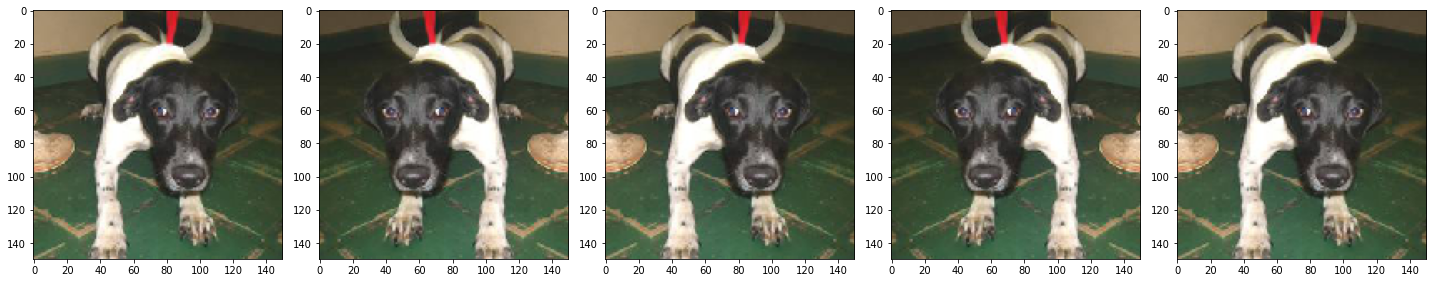

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Rotando la imagen

El aumento de rotación rotará aleatoriamente la imagen hasta un número específico de grados. Aquí, lo estableceremos en 45.

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


Para ver la transformación en acción, tomemos una vez más una imagen de muestra de nuestro conjunto de entrenamiento y repitamos. El aumento se aplicará aleatoriamente (o no) a cada repetición.

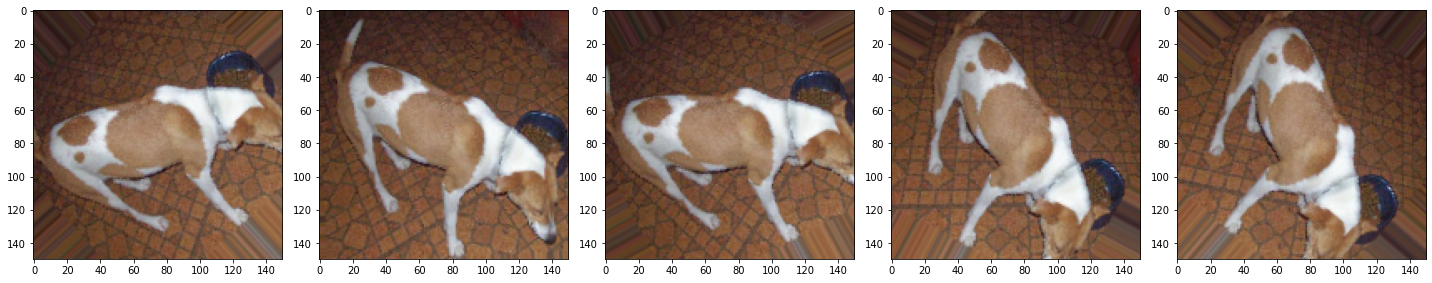

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Aplicación de zoom

También podemos aplicar el aumento de zoom a nuestro conjunto de datos, ampliando las imágenes hasta un 50 % de forma aleatoria.

In [15]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


Una vez más, tome una imagen de muestra de nuestro conjunto de entrenamiento y repítala. El aumento se aplicará aleatoriamente (o no) a cada repetición.

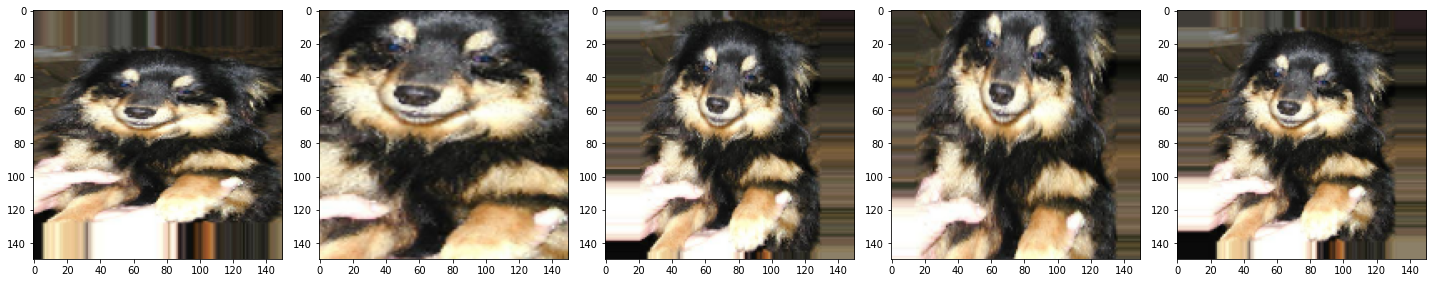

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Poniendolo todo junto


Podemos aplicar todos estos aumentos, e incluso otros, con solo una línea de código, pasando los aumentos como argumentos con valores adecuados. 

Aquí, hemos aplicado cambio de escala, rotación de 45 grados, cambio de ancho, cambio de altura, giro horizontal y aumento de zoom a nuestras imágenes de entrenamiento.

In [17]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


Visualicemos cómo se vería una sola imagen cinco veces diferentes, cuando pasamos estos aumentos aleatoriamente a nuestro Dataset.

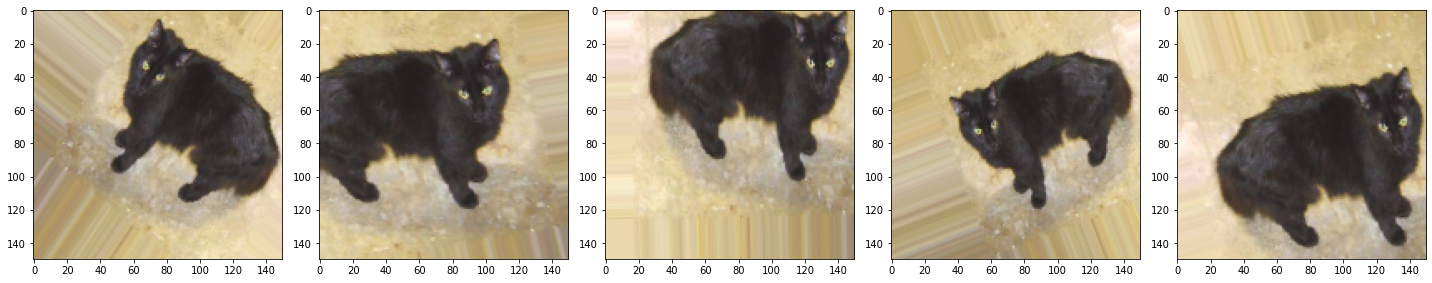

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

###Crear generador de datos de validación

Por lo general, solo aplicamos el aumento de datos a nuestros ejemplos de capacitación, ya que las imágenes originales deben ser representativas de lo que nuestro modelo necesita administrar. Entonces, en este caso, solo estamos redimensionando nuestras imágenes de validación y convirtiéndolas en lotes usando ImageDataGenerator.

In [19]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


# Creación de modelos

## Define the model
El modelo consta de cuatro bloques de convolución con una capa de grupo máximo en cada uno de ellos. Antes de las capas densas finales, también estamos aplicando un Dropout de 0,5. Significa que el 50 % de los valores que entran en la capa Dropout se establecerán en cero. Esto ayuda a evitar el sobreajuste. Luego tenemos una capa totalmente conectada con 512 unidades, con una función de activación `relu`. El modelo generará probabilidades de clase para dos clases, perros y gatos, usando `softmax`.

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

### Compilando el modelo

Como de costumbre, utilizaremos el optimizador `adam`. Dado que generamos una categorización softmax, usaremos `sparse_categorical_crossentropy` como la función de pérdida. También nos gustaría observar la precisión del entrenamiento y la validación en cada época a medida que entrenamos nuestra red, por lo que estamos pasando el argumento de las métricas.

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Resumen del modelo
Veamos todas las capas de nuestra red usando el método summary.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Entrenamiento del modelo

Es hora de que entrenemos a nuestra red.

Dado que nuestros lotes provienen de un generador (ImageDataGenerator), usaremos fit_generator en lugar de fit.

In [23]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
20/20 [==============================] - 28s 847ms/step - loss: 0.6971 - accuracy: 0.5055 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 17s 846ms/step - loss: 0.6922 - accuracy: 0.5140 - val_loss: 0.6885 - val_accuracy: 0.5750
Epoch 3/100
20/20 [==============================] - 18s 885ms/step - loss: 0.6799 - accuracy: 0.5455 - val_loss: 0.6681 - val_accuracy: 0.5740
Epoch 4/100
20/20 [==============================] - 17s 845ms/step - loss: 0.6577 - accuracy: 0.5870 - val_loss: 0.6570 - val_accuracy: 0.5440
Epoch 5/100
20/20 [==============================] - 17s 836ms/step - loss: 0.6473 - accuracy: 0.6155 - val_loss: 0.6164 - val_accuracy: 0.6590
Epoch 6/100
20/20 [==============================] - 17s 842ms/step - loss: 0.6404 - accuracy: 0.6300 - val_loss: 0.5999 - val_accuracy: 0.6730
Epoch 7/100
20/20 [==============================] - 17s 838ms/step - loss: 0.6250 - accuracy: 0.6525 - val_loss: 0.5906 - val_accuracy:

### Visualización de resultados del entrenamiento

Ahora vamos a visualizar los resultados que obtenemos después de entrenar nuestra red.

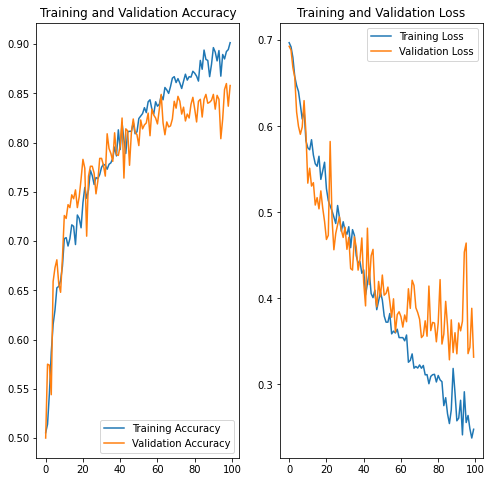

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()